# 전체 데이터 

In [1]:
from sklearn.preprocessing import (LabelEncoder, LabelBinarizer, RobustScaler)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 가져오기 

### 원본 데이터 

In [7]:
df_origin = pd.read_csv('../MACH_data/data.csv',delimiter='\t')
df_origin

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,21017.0,3.0,7.0,18600.0,5.0,20.0,14957.0,2.0,...,1440.0,900.0,1,7,1,30,1,2,5,Marketing
1,5.0,17.0,3818.0,5.0,9.0,7850.0,1.0,16.0,5902.0,3.0,...,1536.0,864.0,1,1,1,60,2,1,2,mathematics
2,5.0,16.0,4186.0,5.0,12.0,2900.0,1.0,2.0,7160.0,1.0,...,375.0,667.0,1,2,2,10,2,1,2,Chemistry
3,2.0,12.0,9373.0,4.0,1.0,10171.0,2.0,7.0,10117.0,1.0,...,1280.0,720.0,1,6,1,60,1,3,2,international relations
4,5.0,13.0,9465.0,5.0,7.0,5284.0,2.0,19.0,8872.0,1.0,...,360.0,640.0,1,4,3,60,1,1,2,Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,9925.0,1.0,6.0,14218.0,2.0,16.0,25499.0,4.0,...,2048.0,1080.0,1,12,1,10,2,2,1,business
73485,5.0,9.0,5816.0,5.0,4.0,4368.0,1.0,15.0,7246.0,1.0,...,1440.0,900.0,1,2,3,60,2,1,2,sociology
73486,2.0,17.0,5353.0,1.0,18.0,6846.0,1.0,9.0,4920.0,1.0,...,1280.0,1024.0,1,1,1,60,2,1,3,NaN
73487,4.0,15.0,7974.0,3.0,9.0,7901.0,5.0,17.0,8647.0,3.0,...,414.0,736.0,1,3,1,10,1,1,4,Business


In [8]:
# null 데이터 삭제
df_origin.dropna(inplace=True)

In [9]:
# major 컬럼 삭제
df_origin.drop('major', axis=1, inplace=True)

In [10]:
cols = []
for i in list(df_origin.columns):
    if "V" not in i:
        cols.append(i)

In [11]:
# 데이터 내부 0 이 있는 index 확인
zero_idx = []
for col in cols:
    zero_idx += list((df_origin[df_origin[col] == 0].index))
len(list(set(zero_idx)))

4646

In [12]:
zero_idx = list(set(zero_idx))

In [13]:
# 0 데이터 삭제 
df_origin = df_origin.drop(zero_idx)

In [14]:
# 범주 데이터를 숫자로 바꿔야함.(그래야 모델에 들어감)
le = LabelEncoder()
df_origin['country'] = le.fit_transform(df_origin['country'])

In [15]:
# target columns 1=yes, 2=no -> 0=no, 1=yes 변환
lb = LabelBinarizer()
lb.fit([0, 1])
df_origin['voted'] = lb.transform(df_origin['voted'])

In [16]:
lb.classes_, lb.pos_label, lb.neg_label

(array([0, 1]), 1, 0)

In [17]:
# LabelBinarizer 확인
df_origin['voted']

0        1
1        0
2        0
3        1
4        1
        ..
73480    1
73482    0
73484    0
73485    0
73487    1
Name: voted, Length: 42489, dtype: int64

In [18]:
df_origin.tail()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize
73480,4.0,15.0,4933.0,1.0,16.0,5172.0,1.0,10.0,5095.0,1.0,...,19,375.0,812.0,1,1,3,60,1,1,3
73482,5.0,1.0,9593.0,5.0,13.0,5202.0,4.0,15.0,10879.0,4.0,...,22,375.0,667.0,1,12,1,10,0,1,1
73484,2.0,17.0,9925.0,1.0,6.0,14218.0,2.0,16.0,25499.0,4.0,...,29,2048.0,1080.0,1,12,1,10,0,2,1
73485,5.0,9.0,5816.0,5.0,4.0,4368.0,1.0,15.0,7246.0,1.0,...,20,1440.0,900.0,1,2,3,60,0,1,2
73487,4.0,15.0,7974.0,3.0,9.0,7901.0,5.0,17.0,8647.0,3.0,...,24,414.0,736.0,1,3,1,10,1,1,4


In [19]:
X_origin = df_origin.drop('voted', axis=1)
y_origin = df_origin['voted']

In [20]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_origin, y_origin, test_size=0.2,
                                                   random_state=13)

### 전처리 된 데이터 

In [7]:
df_18 = pd.read_csv('../MACH_data/data_cutoff_age18.csv' )
df_18

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,3.0,6.0,21.0,3.0,7.0,19.0,5.0,20.0,15.0,2.0,...,Christian(othrer),Heterosexual,Black,Yes,Currently married,5,75.0,35.0,33.0,7.0
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
4,3.0,11.0,4.0,3.0,10.0,4.0,2.0,17.0,5.0,4.0,...,Atheist,Heterosexual,White,Yes,Never married,2,66.0,28.0,31.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54713,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
54714,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
54715,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0
54716,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,Buddhist,Heterosexual,Asian,Yes,Never married,4,53.0,25.0,22.0,6.0


In [8]:
df_18.columns

Index(['Q1_TP_notell_2u', 'Q1I', 'Q1E_notell_2u', 'Q2_TP_ppl_nd_dangun', 'Q2I',
       'Q2E_ppl_nd_dangun', 'Q3_TN_do_moral', 'Q3I', 'Q3E_do_moral',
       'Q4_VN_ppl_good',
       ...
       'religion', 'orientation', 'race', 'voted', 'married', 'familysize',
       'score', 'v_score', 't_score', 'm_score'],
      dtype='object', length=108)

In [9]:
lb = LabelBinarizer()
df_18['voted'] = lb.fit_transform(df_18['voted'])

In [10]:
df_18['voted']

0        1
1        0
2        1
3        1
4        1
        ..
54713    0
54714    0
54715    0
54716    1
54717    0
Name: voted, Length: 54718, dtype: int64

In [11]:
df_18_dumi = pd.get_dummies(df_18)

In [12]:
df_18_dumi.tail()

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,married_Currently married,married_Never married,married_Previously married
54713,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,0,1,0,0,0,0,0,1,0,0
54714,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,0,0,0,0,0,0,1,0,1,0
54715,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,0,0,0,0,0,0,1,0,1,0
54716,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,0,1,0,0,0,0,0,0,1,0
54717,3.0,12.0,8.0,1.0,10.0,6.0,5.0,13.0,37.0,1.0,...,0,0,0,0,0,1,0,0,1,0


In [13]:
X_18_dumi = df_18_dumi.drop('voted', axis=1)
y_18_dumi = df_18_dumi['voted']

In [14]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_18_dumi, y_18_dumi, test_size=0.2,
                                                   random_state=13)

In [46]:
X_train_d

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,married_Currently married,married_Never married,married_Previously married
54695,5.0,11.0,3.0,5.0,18.0,4.0,1.0,14.0,4.0,1.0,...,0,0,0,0,0,0,1,0,1,0
46053,3.0,19.0,8.0,2.0,8.0,6.0,5.0,7.0,5.0,3.0,...,0,0,0,0,0,0,1,0,1,0
28461,5.0,7.0,5.0,4.0,18.0,3.0,5.0,11.0,1.0,4.0,...,0,0,0,0,0,0,1,0,1,0
32791,2.0,17.0,7.0,1.0,12.0,4.0,4.0,14.0,4.0,4.0,...,0,1,0,0,0,0,0,0,1,0
33975,5.0,13.0,6.0,5.0,20.0,5.0,2.0,4.0,6.0,1.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,4.0,19.0,6.0,5.0,3.0,19.0,3.0,9.0,10.0,3.0,...,0,1,0,0,0,0,0,0,1,0
33634,5.0,3.0,11.0,5.0,11.0,7.0,5.0,16.0,7.0,3.0,...,0,0,1,0,0,0,0,0,1,0
32842,4.0,7.0,11.0,3.0,12.0,6.0,2.0,13.0,82.0,2.0,...,0,0,0,0,0,0,1,0,1,0
47280,4.0,17.0,5.0,5.0,19.0,3.0,5.0,13.0,13.0,4.0,...,0,0,0,0,0,0,1,0,1,0


## Decision Tree

### 원본데이터

In [29]:
dt_o = DecisionTreeClassifier()
dt_o.fit(X_train_o, y_train_o)

y_pre_tr_o=dt_o.predict(X_train_o)
y_pre_test_o=dt_o.predict(X_test_o)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(y_train_o, y_pre_tr_o), 
                                              roc_auc_score(y_train_o, y_pre_tr_o)))
print('Test ACC : {}, Train AUC : {}'.format(accuracy_score(y_test_o, y_pre_test_o), 
                                             roc_auc_score(y_test_o, y_pre_test_o)))

Train ACC : 1.0, Train AUC : 1.0
Test ACC : 0.5788420804895269, Train AUC : 0.5775385511266397


In [30]:
ori_fm = pd.DataFrame(zip(X_origin.columns, dt_o.feature_importances_), columns=['columns', 'importance'])
ori_fm

,columns,importance
0,Q1A,0.004082
1,Q1I,0.014272
2,Q1E,0.013492
3,Q2A,0.003796
4,Q2I,0.011761
...,...,...
98,religion,0.007375
99,orientation,0.002740
100,race,0.031810
101,married,0.011129


In [33]:
ori_fm.sort_values('importance', ascending=False)[:10]

,columns,importance
94,age,0.092623
60,country,0.036346
100,race,0.031810
20,Q7E,0.023301
38,Q13E,0.021348
44,Q15E,0.020328
41,Q14E,0.018907
56,Q19E,0.018862
14,Q5E,0.018731
32,Q11E,0.018668


### 전처리 된 데이터

In [31]:
dt_d = DecisionTreeClassifier()
dt_d.fit(X_train_d, y_train_d)

y_pre_tr_d=dt_d.predict(X_train_d)
y_pre_test_d=dt_d.predict(X_test_d)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(y_train_d, y_pre_tr_d), 
                                              roc_auc_score(y_train_d, y_pre_tr_d)))
print('Test ACC : {}, Train AUC : {}'.format(accuracy_score(y_test_d, y_pre_test_d), 
                                             roc_auc_score(y_test_d, y_pre_test_d)))

Train ACC : 1.0, Train AUC : 1.0
Test ACC : 0.573921783625731, Train AUC : 0.572492847529425


In [32]:
dumi_fm = pd.DataFrame(zip(X_18_dumi.columns, dt_d.feature_importances_), columns=['columns', 'importance'])
dumi_fm

,columns,importance
0,Q1_TP_notell_2u,0.004245
1,Q1I,0.012634
2,Q1E_notell_2u,0.010179
3,Q2_TP_ppl_nd_dangun,0.003076
4,Q2I,0.012544
...,...,...
334,race_Other,0.000712
335,race_White,0.019007
336,married_Currently married,0.006890
337,married_Never married,0.001152


In [34]:
dumi_fm.sort_values('importance', ascending=False)[:10]

,columns,importance
73,age,0.072664
62,surveyelapse,0.019639
335,race_White,0.019007
13,Q5I,0.015625
16,Q6I,0.015078
22,Q8I,0.014967
55,Q19I,0.014934
34,Q12I,0.014795
60,introelapse,0.014770
10,Q4I,0.014639


### score vs voted

> score는 중요컬럼이라고 생각되서 가중치를 주기로 결정.  
그 가중치 기준을 정하기 위해 score와 voted의 관계를 확인

In [44]:
df_score = df_18[['score', 'v_score', 't_score', 'm_score', 'voted']]
df_score.tail()

,score,v_score,t_score,m_score,voted
54713,59.0,28.0,26.0,5.0,0
54714,90.0,37.0,43.0,10.0,0
54715,69.0,34.0,27.0,8.0,0
54716,53.0,25.0,22.0,6.0,1
54717,64.0,36.0,23.0,5.0,0


In [45]:
X_s = df_score.drop('voted', axis=1)
y_s = df_score['voted']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2,
                                                   random_state=13)

In [46]:
dt_s = DecisionTreeClassifier()
dt_s.fit(X_train_s, y_train_s)

y_pre_tr_s=dt_s.predict(X_train_s)
y_pre_test_s=dt_s.predict(X_test_s)

print('Train ACC : {}, Train AUC : {}'.format(accuracy_score(y_train_s, y_pre_tr_s), 
                                              roc_auc_score(y_train_s, y_pre_tr_s)))
print('Test ACC : {}, Train AUC : {}'.format(accuracy_score(y_test_s, y_pre_test_s), 
                                             roc_auc_score(y_test_s, y_pre_test_s)))

Train ACC : 0.6327500342669165, Train AUC : 0.6319700720732493
Test ACC : 0.5134320175438597, Train AUC : 0.5122403891884404


In [47]:
score_fm = pd.DataFrame(zip(X_s.columns, dt_s.feature_importances_), columns=['columns', 'importance'])
score_fm.sort_values('importance', ascending=False)

,columns,importance
0,score,0.273828
2,t_score,0.270943
1,v_score,0.265208
3,m_score,0.190021


In [ ]:
df_score.plot

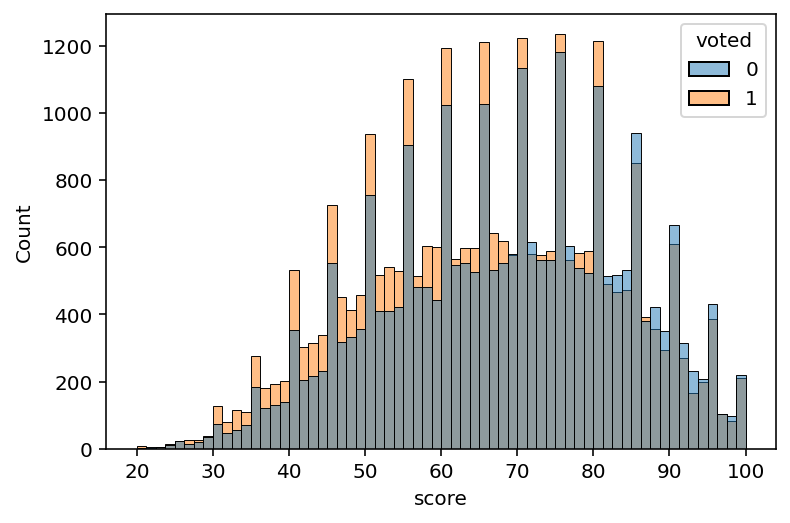

In [54]:
sns.histplot(x=df_score['score'], hue=df_score['voted'])

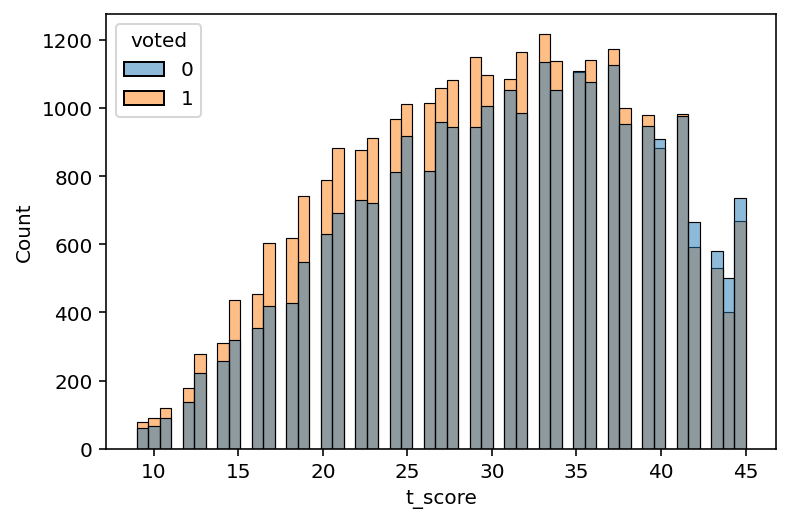

In [55]:
sns.histplot(x=df_score['t_score'], hue=df_score['voted'])

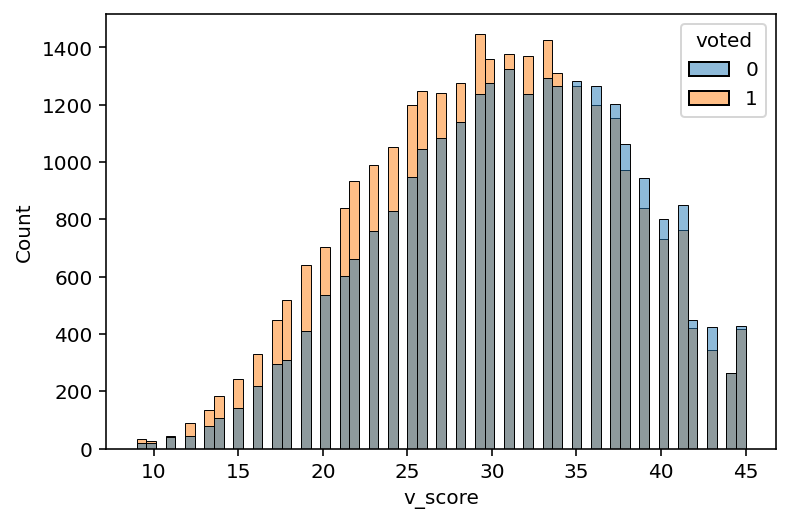

In [56]:
sns.histplot(x=df_score['v_score'], hue=df_score['voted'])

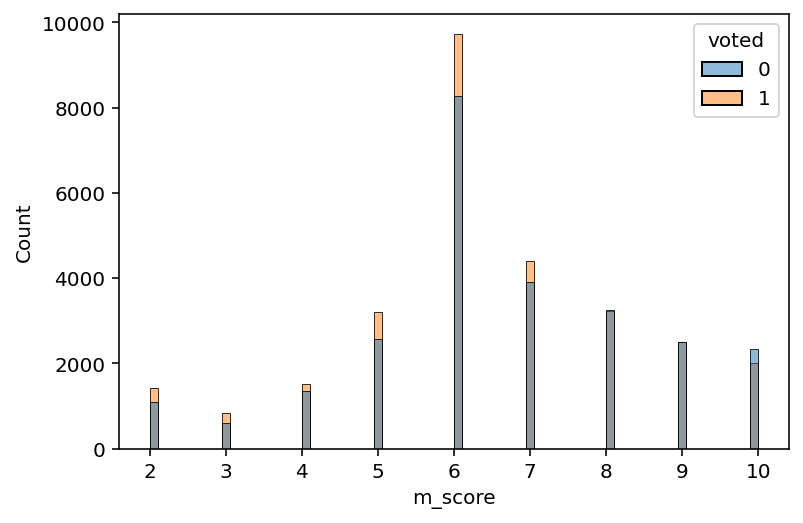

In [57]:
sns.histplot(x=df_score['m_score'], hue=df_score['voted'])

## RobustScaler

## 모델 적용전 범주화 전처리 - `성용오빠 자료 참고`

In [37]:
df = pd.read_csv('../MACH_data/data_cutoff_age18.csv')

In [ ]:
# X_train_d, X_test_d, y_train_d, y_test_d 

In [15]:
X_train_d

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,married_Currently married,married_Never married,married_Previously married
54695,5.0,11.0,3.0,5.0,18.0,4.0,1.0,14.0,4.0,1.0,...,0,0,0,0,0,0,1,0,1,0
46053,3.0,19.0,8.0,2.0,8.0,6.0,5.0,7.0,5.0,3.0,...,0,0,0,0,0,0,1,0,1,0
28461,5.0,7.0,5.0,4.0,18.0,3.0,5.0,11.0,1.0,4.0,...,0,0,0,0,0,0,1,0,1,0
32791,2.0,17.0,7.0,1.0,12.0,4.0,4.0,14.0,4.0,4.0,...,0,1,0,0,0,0,0,0,1,0
33975,5.0,13.0,6.0,5.0,20.0,5.0,2.0,4.0,6.0,1.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,4.0,19.0,6.0,5.0,3.0,19.0,3.0,9.0,10.0,3.0,...,0,1,0,0,0,0,0,0,1,0
33634,5.0,3.0,11.0,5.0,11.0,7.0,5.0,16.0,7.0,3.0,...,0,0,1,0,0,0,0,0,1,0
32842,4.0,7.0,11.0,3.0,12.0,6.0,2.0,13.0,82.0,2.0,...,0,0,0,0,0,0,1,0,1,0
47280,4.0,17.0,5.0,5.0,19.0,3.0,5.0,13.0,13.0,4.0,...,0,0,0,0,0,0,1,0,1,0


In [16]:
from sklearn.preprocessing import RobustScaler

def tran_robust(df):
    num_cols = []
    for col in df.columns:
        if ("E" in col) | ("age" in col) |("family" in col) |("elapse" in col):
            num_cols.append(col)
    rs = RobustScaler()
    df[num_cols] = rs.fit_transform(df[num_cols])
    return df

In [17]:
X_train_d = tran_robust(X_train_d)

In [18]:
X_train_d

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,married_Currently married,married_Never married,married_Previously married
54695,5.0,11.0,-0.666667,5.0,18.0,-0.50,1.0,14.0,-0.666667,1.0,...,0,0,0,0,0,0,1,0,1,0
46053,3.0,19.0,0.166667,2.0,8.0,0.00,5.0,7.0,-0.500000,3.0,...,0,0,0,0,0,0,1,0,1,0
28461,5.0,7.0,-0.333333,4.0,18.0,-0.75,5.0,11.0,-1.166667,4.0,...,0,0,0,0,0,0,1,0,1,0
32791,2.0,17.0,0.000000,1.0,12.0,-0.50,4.0,14.0,-0.666667,4.0,...,0,1,0,0,0,0,0,0,1,0
33975,5.0,13.0,-0.166667,5.0,20.0,-0.25,2.0,4.0,-0.333333,1.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,4.0,19.0,-0.166667,5.0,3.0,3.25,3.0,9.0,0.333333,3.0,...,0,1,0,0,0,0,0,0,1,0
33634,5.0,3.0,0.666667,5.0,11.0,0.25,5.0,16.0,-0.166667,3.0,...,0,0,1,0,0,0,0,0,1,0
32842,4.0,7.0,0.666667,3.0,12.0,0.00,2.0,13.0,12.333333,2.0,...,0,0,0,0,0,0,1,0,1,0
47280,4.0,17.0,-0.333333,5.0,19.0,-0.75,5.0,13.0,0.833333,4.0,...,0,0,0,0,0,0,1,0,1,0


In [19]:

aa = pd.DataFrame(X_train_d.describe())
bb = aa.loc[:,((aa.loc["max",:] == 1) & (aa.loc["min",:] == 0))]
df1 = X_train_d[bb.columns].copy()

datas = []
for i in df1.columns:
    datas.append(i)
data = []
for i in datas:
    if "VCL" not in i:
        data.append(i)

not_vcl = list(set(pd.Series(data).str.split("_").str[0]))
df2 = df1[data]

for index in range(len(not_vcl)):
    
    cc = []
    
    for i,j in enumerate(list(df2.columns)):
        if not_vcl[index] in j:
            cc.append(i)
            
    
    df3 = df2.iloc[:,cc]
    df4 = pd.concat([df3,y_train_d], axis=1)
    df5 = pd.DataFrame(df4.groupby("voted").sum())
    df6 = abs((df5.iloc[1,:] - df5.iloc[0,:])/df5.sum()) *10
    X_train_d[df2.iloc[:,cc].columns] = (X_train_d[df2.iloc[:,cc].columns]* df6)
    

In [20]:
X_train_d

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,married_Currently married,married_Never married,married_Previously married
54695,5.0,11.0,-0.666667,5.0,18.0,-0.50,1.0,14.0,-0.666667,1.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.510545,0.0,0.500274,0.000000
46053,3.0,19.0,0.166667,2.0,8.0,0.00,5.0,7.0,-0.500000,3.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.510545,0.0,0.500274,0.000000
28461,5.0,7.0,-0.333333,4.0,18.0,-0.75,5.0,11.0,-1.166667,4.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.510545,0.0,0.500274,0.000000
32791,2.0,17.0,0.000000,1.0,12.0,-0.50,4.0,14.0,-0.666667,4.0,...,0.0,2.689431,0.000000,0.0,0.0,0.0,0.000000,0.0,0.500274,0.000000
33975,5.0,13.0,-0.166667,5.0,20.0,-0.25,2.0,4.0,-0.333333,1.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.510545,0.0,0.500274,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,4.0,19.0,-0.166667,5.0,3.0,3.25,3.0,9.0,0.333333,3.0,...,0.0,2.689431,0.000000,0.0,0.0,0.0,0.000000,0.0,0.500274,0.000000
33634,5.0,3.0,0.666667,5.0,11.0,0.25,5.0,16.0,-0.166667,3.0,...,0.0,0.000000,0.457002,0.0,0.0,0.0,0.000000,0.0,0.500274,0.000000
32842,4.0,7.0,0.666667,3.0,12.0,0.00,2.0,13.0,12.333333,2.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.510545,0.0,0.500274,0.000000
47280,4.0,17.0,-0.333333,5.0,19.0,-0.75,5.0,13.0,0.833333,4.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,1.510545,0.0,0.500274,0.000000


In [21]:
# ada, gbc, xgb, lgbm

In [22]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [23]:
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [24]:
models = [ada, gbc, xgb, lgbm]
model_names = ['Ada', 'GBC', 'XGB', 'LGBM']

In [25]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

def get_score(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
   
    return acc, auc, pre, rec, f1

def print_score(y_test, pred, confusion=False, score=False):
    acc, auc, pre, rec, f1 = get_score(y_test, pred)
    con = confusion_matrix(y_test, pred)
    if confusion==True:
        print('confusion matrix')
        print(con)
        print('='*20)
    
    if score==True:
        print('Accuracy: {0:.4f}, AUC: {1:.4f}'.format(acc, auc))
        print('Recall: {0:.4f}, f1_score: {1:.4f}, precision: {2:.4f}'.format(rec, f1, pre))
        

In [26]:
import time

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_test = model.predict(X_test)
    
    return get_score(y_test, y_pre_test)

def models_score_df(models, model_names, X_train, X_test, y_train, y_test):
    cols_names = ['accuracy', 'AUC', 'precision', 'recall', 'f1']
    datas = []
    for model in models:
        datas.append(fit_model(model, X_train, X_test, y_train, y_test))
     
    return pd.DataFrame(datas, columns=cols_names, index=model_names)


In [27]:
# 숫자 데이터만 robust 

In [25]:
models_score_df(models, model_names, X_train_d, X_test_d, y_train_d, y_test_d)

,accuracy,AUC,precision,recall,f1
Ada,0.599232,0.582200,0.575975,0.904704,0.703849
GBC,0.584613,0.564838,0.563235,0.939247,0.704191
XGB,0.571820,0.558030,0.564271,0.819129,0.668224
LGBM,0.559759,0.537157,0.546330,0.965110,0.697704


In [ ]:
# 가충치 * 10 + Robust

In [28]:
models_score_df(models, model_names, X_train_d, X_test_d, y_train_d, y_test_d)

,accuracy,AUC,precision,recall,f1
Ada,0.508498,0.514764,0.545672,0.396112,0.459016
GBC,0.531067,0.505491,0.529188,0.989759,0.689647
XGB,0.527869,0.514813,0.536281,0.762020,0.629526
LGBM,0.527869,0.501815,0.527318,0.995140,0.689352


In [ ]:
# yes - no 

In [26]:
models_score_df(models, model_names, X_train_d, X_test_d, y_train_d, y_test_d)

,accuracy,AUC,precision,recall,f1
Ada,0.599232,0.582200,0.575975,0.904704,0.703849
GBC,0.584613,0.564848,0.563248,0.939073,0.704152
XGB,0.558754,0.539609,0.549250,0.902100,0.682783
LGBM,0.559759,0.537157,0.546330,0.965110,0.697704


In [ ]:
## yes - no 10

In [ ]:
# no - yes

In [26]:
models_score_df(models, model_names, X_train_d, X_test_d, y_train_d, y_test_d)

,accuracy,AUC,precision,recall,f1
Ada,0.599232,0.582200,0.575975,0.904704,0.703849
GBC,0.584704,0.564935,0.563294,0.939247,0.704236
XGB,0.571820,0.558030,0.564271,0.819129,0.668224
LGBM,0.559759,0.537157,0.546330,0.965110,0.697704


In [ ]:
# abs 

In [27]:
models_score_df(models, model_names, X_train_d, X_test_d, y_train_d, y_test_d)

,accuracy,AUC,precision,recall,f1
Ada,0.599232,0.582200,0.575975,0.904704,0.703849
GBC,0.584430,0.564646,0.563118,0.939247,0.704099
XGB,0.571820,0.558030,0.564271,0.819129,0.668224
LGBM,0.559759,0.537157,0.546330,0.965110,0.697704


In [ ]:
# abs * 10

In [27]:
models_score_df(models, model_names, X_train_d, X_test_d, y_train_d, y_test_d)

,accuracy,AUC,precision,recall,f1
Ada,0.587537,0.570616,0.569132,0.890991,0.694587
GBC,0.558388,0.536252,0.546032,0.955390,0.694906
XGB,0.545139,0.531391,0.546948,0.791703,0.646950
LGBM,0.559759,0.537157,0.546330,0.965110,0.697704


## 원본

In [25]:
models_score_df(models, model_names, X_train_d, X_test_d, y_train_d, y_test_d)

,accuracy,AUC,precision,recall,f1
Ada,0.650402,0.644314,0.641925,0.759590,0.695818
GBC,0.656250,0.649568,0.643958,0.776081,0.703873
XGB,0.648209,0.644031,0.648809,0.723138,0.683960
LGBM,0.657255,0.651714,0.649821,0.756639,0.699174


In [320]:
### robust 함수 테스트

In [314]:
from sklearn.preprocessing import RobustScaler

def tran_robust(df):
    num_cols = []
    for col in df_nz.columns:
        if ("E" in col) | ("age" in col) |("family" in col) |("elapse" in col):
            num_cols.append(col)
    rs = RobustScaler()
    df[num_cols] = rs.fit_transform(df[num_cols])
    return df

In [316]:
tran_robust(df)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
0,3.0,6.0,2.404651,3.0,7.0,2.559208,5.0,20.0,1.127609,2.0,...,1440.0,900.0,1,7,1,30,1,2,3.0,Marketing
1,5.0,17.0,-0.602299,5.0,9.0,0.319041,1.0,16.0,-0.323571,3.0,...,1536.0,864.0,1,1,1,60,2,1,0.0,mathematics
2,5.0,16.0,-0.537961,5.0,12.0,-0.712477,1.0,2.0,-0.121960,1.0,...,375.0,667.0,1,2,2,10,2,1,0.0,Chemistry
3,2.0,12.0,0.368897,4.0,1.0,0.802709,2.0,7.0,0.351937,1.0,...,1280.0,720.0,1,6,1,60,1,3,0.0,international relations
4,5.0,13.0,0.384982,5.0,7.0,-0.215681,2.0,19.0,0.152410,1.0,...,360.0,640.0,1,4,3,60,1,1,0.0,Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73484,2.0,17.0,0.465405,1.0,6.0,1.646054,2.0,16.0,2.817100,4.0,...,2048.0,1080.0,1,12,1,10,2,2,-1.0,business
73485,5.0,9.0,-0.252983,5.0,4.0,-0.406564,1.0,15.0,-0.108177,1.0,...,1440.0,900.0,1,2,3,60,2,1,0.0,sociology
73486,2.0,17.0,-0.333931,1.0,18.0,0.109820,1.0,9.0,-0.480949,1.0,...,1280.0,1024.0,1,1,1,60,2,1,1.0,NaN
73487,4.0,15.0,0.124306,3.0,9.0,0.329669,5.0,17.0,0.116351,3.0,...,414.0,736.0,1,3,1,10,1,1,2.0,Business


In [318]:
### 여러모델 돌리고 결과 나오는 함수

In [404]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

def get_score(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
   
    return acc, auc, pre, rec, f1

def print_score(y_test, pred, confusion=False, score=False):
    acc, auc, pre, rec, f1 = get_score(y_test, pred)
    con = confusion_matrix(y_test, pred)
    if confusion==True:
        print('confusion matrix')
        print(con)
        print('='*20)
    
    if score==True:
        print('Accuracy: {0:.4f}, AUC: {1:.4f}'.format(acc, auc))
        print('Recall: {0:.4f}, f1_score: {1:.4f}, precision: {2:.4f}'.format(rec, f1, pre))
        

In [397]:
print_score(y_test, y_pre_test, confusion=True, score=True)

confusion matrix
[[4476   83]
 [3023  249]]
Accuracy: 0.6034, AUC: 0.5289
Recall: 0.0761, f1_score: 0.1382, precision: 0.7500


In [ ]:
# ada, gbc, xgb, lgbm

In [398]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [399]:
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [401]:
models = [ada, gbc, xgb, lgbm]
model_names = ['Ada', 'GBC', 'XGB', 'LGBM']

In [405]:
import time

def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_test = model.predict(X_test)
    
    return get_score(y_test, y_pre_test)

def models_score_df(models, model_names, X_train, X_test, y_train, y_test):
    cols_names = ['accuracy', 'AUC', 'precision', 'recall', 'f1']
    datas = []
    for model in models:
        datas.append(fit_model(model, X_train, X_test, y_train, y_test))
     
    return pd.DataFrame(datas, columns=cols_names, index=model_names)


In [406]:
models_score_df(models, model_names, X_train, X_test, y_train, y_test)

,accuracy,AUC,precision,recall,f1
Ada,0.619461,0.555664,0.681592,0.167482,0.268891
GBC,0.603371,0.528947,0.750000,0.076100,0.138180
XGB,0.585366,0.529401,0.510322,0.188875,0.275708
LGBM,0.610139,0.551541,0.603595,0.194988,0.294756
